In [145]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 68

# Specify each path

In [146]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [147]:
NUM_CLASSES = 10

# Dataset reading

In [148]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, 43)))

In [149]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.8, random_state=RANDOM_SEED)

# Model building

In [151]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [152]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_18 (Dropout)        (None, 42)                0         
                                                                 
 dense_27 (Dense)            (None, 20)                860       
                                                                 
 dropout_19 (Dropout)        (None, 20)                0         
                                                                 
 dense_28 (Dense)            (None, 10)                210       
                                                                 
 dense_29 (Dense)            (None, 10)                110       
                                                                 
Total params: 1180 (4.61 KB)
Trainable params: 1180 (4.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [153]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [154]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [155]:
model.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/200
129/139 [==========================>...] - ETA: 0s - loss: 2.0874 - accuracy: 0.2230
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
139/139 [==============================] - 2s 8ms/step - loss: 2.0687 - accuracy: 0.2325 - val_loss: 1.6369 - val_accuracy: 0.5242
Epoch 2/200
 10/139 [=>............................] - ETA: 0s - loss: 1.6990 - accuracy: 0.4000

c:\Users\Admin\Desktop\Major Project\Final Project\VocalWave\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


129/139 [==========================>...] - ETA: 0s - loss: 1.4981 - accuracy: 0.4519
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
139/139 [==============================] - 1s 8ms/step - loss: 1.4836 - accuracy: 0.4567 - val_loss: 1.0889 - val_accuracy: 0.6577
Epoch 3/200
133/139 [===========================>..] - ETA: 0s - loss: 1.1952 - accuracy: 0.5540
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
139/139 [==============================] - 1s 6ms/step - loss: 1.1922 - accuracy: 0.5562 - val_loss: 0.8653 - val_accuracy: 0.7890
Epoch 4/200
133/139 [===========================>..] - ETA: 0s - loss: 1.0677 - accuracy: 0.5987
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
139/139 [==============================] - 1s 6ms/step - loss: 1.0671 - accuracy: 0.5986 - val_loss: 0.7321 - val_accuracy: 0.8333
Epoch 5/200
135/139 [============================>.] - ETA: 0s - loss: 0.9771 - accuracy: 0.6367
Epo

In [156]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

35/35 [==============================] - 0s 5ms/step - loss: 0.1694 - accuracy: 0.9684


In [157]:
# Loading the saved model
# model = tf.keras.models.load_model(model_save_path)

# Confusion matrix

139/139 [==============================] - 0s 2ms/step


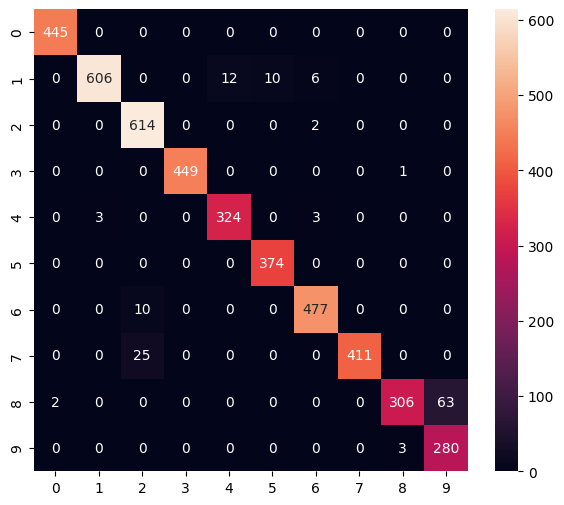

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       445
           1       1.00      0.96      0.98       634
           2       0.95      1.00      0.97       616
           3       1.00      1.00      1.00       450
           4       0.96      0.98      0.97       330
           5       0.97      1.00      0.99       374
           6       0.98      0.98      0.98       487
           7       1.00      0.94      0.97       436
           8       0.99      0.82      0.90       371
           9       0.82      0.99      0.89       283

    accuracy                           0.97      4426
   macro avg       0.97      0.97      0.96      4426
weighted avg       0.97      0.97      0.97      4426



In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [159]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

c:\Users\Admin\Desktop\Major Project\Final Project\VocalWave\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [160]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmpzz9ghiqy\assets


INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmpzz9ghiqy\assets


6876